## Imports

In [48]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Maths
import numpy as np
import matplotlib.pyplot as plt

# Gym
import gym

# Common
import os
import sys

# Other
from collections import deque

## Data structure for storing changes

In [49]:
import copy

class RamChange():
    def __init__(self, initialRAM):
        self.initialRAM = initialRAM
        self.vals = [0] * len(initialRAM)   # Track how many times each cell changes
        self.previous = initialRAM
        self.ranking = []

    def change(self, newRAM):
        for i in range(len(newRAM)):
            if newRAM[i] != self.previous[i]:
                self.vals[i] += 1
        self.previous = newRAM

    def get_ranking(self):
        # Find best
        self.ranking = []
        vs = copy.deepcopy(self.vals)
        usedIndex = []
        for i in range(len(vs)):
            max = None
            max_index = None
            for j in range(len(vs)):
                if (max is None or max < vs[j]) and j not in usedIndex:
                    max = vs[j]
                    max_index = j

            self.ranking.append((max_index, max))
            vs[max_index] = 0
            usedIndex.append(max_index)
        return self.ranking

    def prepare_lists(self):
        indices = []
        num_occurances = []
        for i in range(len(self.vals)):
            indices.append(i)
            num_occurances.append(self.vals[i])

        return indices, num_occurances

    def __str__(self):
        return self.vals

## Loading Model

In [50]:
keras.backend.clear_session()

env = gym.make("AssaultNoFrameskip-v4")
input_shape = (98, 80, 1)
n_outputs = env.action_space.n

initializer = keras.initializers.VarianceScaling()

# Create Model
model = keras.models.Sequential([
    keras.layers.Dense(units=128, activation="relu", kernel_initializer=initializer),
    keras.layers.Dense(n_outputs, activation="relu", kernel_initializer=initializer)
])
model.build((None, 128))

In [51]:
# Load Existing Model (if it exists)
model.load_weights(os.getcwd() + "\RAM_Weights_Experiment\checkpoint.ckpt")
print("Successfully Loaded Previous Weights")

Successfully Loaded Previous Weights


## Running Experiment

In [52]:
done = False
obs = env.reset()
ram = env.ale.getRAM()

changes = RamChange(ram)

arr = []

while not done:
    prevRAM = ram
    obs, reward, done, info = env.step(0)
    ram = env.ale.getRAM()

    arr.append(np.abs(ram - prevRAM))

    if not done:
        changes.change(ram)

In [53]:
r = changes.get_ranking()
print(r)

[(103, 642), (107, 642), (102, 640), (61, 639), (116, 617), (122, 608), (123, 328), (35, 319), (38, 319), (33, 318), (34, 318), (36, 318), (37, 318), (80, 317), (81, 317), (68, 304), (69, 304), (17, 218), (19, 218), (23, 68), (60, 64), (10, 60), (63, 51), (30, 40), (71, 40), (110, 40), (45, 36), (47, 36), (126, 24), (127, 17), (31, 12), (114, 10), (50, 9), (9, 8), (75, 8), (120, 8), (121, 8), (48, 7), (49, 7), (92, 6), (105, 6), (124, 6), (56, 5), (70, 5), (101, 4), (52, 3), (55, 3), (51, 2), (53, 2), (62, 2), (21, 1), (24, 1), (25, 1), (44, 1), (46, 1), (54, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (18, 0), (20, 0), (22, 0), (26, 0), (27, 0), (28, 0), (29, 0), (32, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (57, 0), (58, 0), (59, 0), (64, 0), (65, 0), (66, 0), (67, 0), (72, 0), (73, 0), (74, 0), (76, 0), (77, 0), (78, 0), (79, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0)

In [54]:
print(changes.initialRAM)

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 100
 100 100   0   0   0   0  88 254   0   0 192   0 136 252   2   2   2   2
 130 130 130   6 188 255   0  25   0 253   0 253 128  64 128 128  64 128
   0   0   0   0   0   0   0   0  16  16   0 253   0 127 115 100  64  19
  24   0 253   0   0   0   0   0   2 130   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   4 207  68   0  10   0   4
   0   0 255 248   0   0  64   0 172   0   0   0  15 252 157 251  64 251
 112 243]


In [55]:
print(changes.previous)

[  0   0   0   0   0   0   0   0   0   0   0  96 254   0   0   0   6 146
 100 146   0 198   0   0   0 253   0   0 192   0 136 252   2   2  89 215
 146 233  72   6 188 255   0  25 160 252 168 252  64 128  64 128 128 128
 192 192 192   0   0   0   0   3  18  31   0 253   0 127  70  55 128  19
  24   0 253   0   0   0   0   0   2 146   0 254   0 254   0 254   0 254
   0 254 144  60   0   0   0   0   0  80 254   0 117 198   0   7   0  14
   0   0 255 248   0   0  64   0 154   0   0   0  15 252 248 251  64 251
   9 245]


In [56]:
print(changes.vals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 60, 0, 0, 0, 0, 0, 0, 218, 0, 218, 0, 1, 0, 68, 1, 1, 0, 0, 0, 0, 40, 12, 0, 318, 318, 319, 318, 318, 319, 0, 0, 0, 0, 0, 1, 36, 1, 36, 7, 7, 9, 2, 3, 2, 1, 3, 5, 0, 0, 0, 64, 639, 2, 51, 0, 0, 0, 0, 304, 304, 5, 40, 0, 0, 0, 8, 0, 0, 0, 0, 317, 317, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 640, 642, 0, 6, 0, 642, 0, 0, 40, 0, 0, 0, 10, 0, 617, 0, 0, 0, 8, 8, 608, 328, 6, 0, 24, 17]


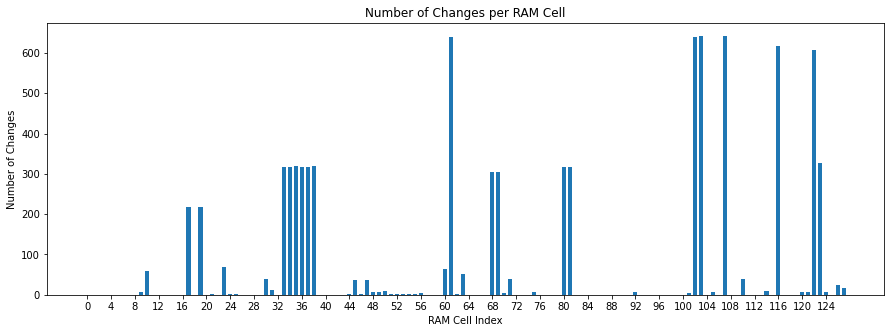

In [57]:
indices, num_occurances = changes.prepare_lists()

# print(indices, num_occurances)

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot()

ax.bar(indices, num_occurances, width=0.7)

plt.xticks(range(0, 128), indices)
ax.locator_params(axis='x', nbins=32)

ax.set_xlabel("RAM Cell Index")
ax.set_ylabel("Number of Changes")
ax.set(title="Number of Changes per RAM Cell")

plt.show()

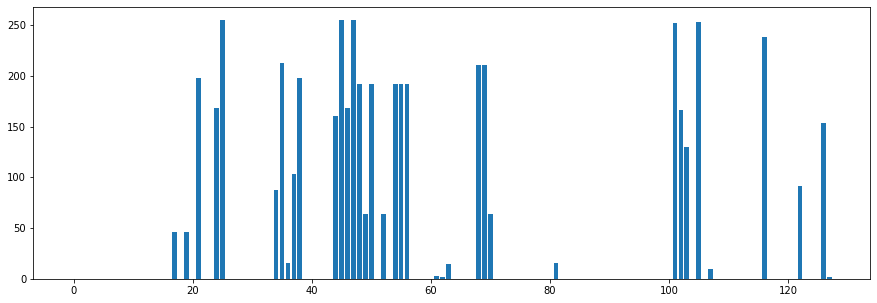

In [58]:
histogram = arr[0]
for i in arr[1:]:
    histogram = histogram + (i)

plt.figure(figsize=(15, 5))
plt.bar(range(128), histogram)
plt.show()